In [1]:
import numpy as np
import datetime
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.callbacks import TensorBoard
from keras.datasets import mnist
import tensorflow as tf

from utils import *
from autoencoders import *

In [2]:
keras.backend.clear_session()
print("GPUs Available: ", tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())

GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


In [3]:
w_length = 200
w_increment = 100

path = 'D:\Documentos\Datasets\Grabaciones 1'

raw_data = loadRawData(path, w_length, w_increment)

AT_FE1.txt
AT_FE2.txt
AT_FE3.txt
AT_FE4.txt
AT_FE_EC1.txt
AT_FE_EC2.txt
AT_FE_FC1.txt
AT_FE_FC2.txt
AT_PS1.txt
AT_PS2.txt
AT_PS3.txt
AT_PS4.txt
AT_PS5.txt
AT_PS_PC1.txt
AT_PS_PC2.txt
AT_PS_SC1.txt
AT_PS_SC2.txt
JT_FE1.txt
JT_FE2.txt
JT_FE_EC1.txt
JT_FE_EC2.txt
JT_FE_FC1.txt
JT_FE_FC2.txt
JT_PS1.txt
JT_PS2.txt
JT_PS_PC1.txt
JT_PS_PC2.txt
JT_PS_SC1.txt
JT_PS_SC2.txt
SV_FE1.txt
SV_FE2.txt
SV_FE3.txt
SV_FE4.txt
SV_FE_EC1.txt
SV_FE_EC2.txt
SV_FE_FC1.txt
SV_FE_FC2.txt
SV_PS1.txt
SV_PS2.txt
SV_PS_PC1.txt
SV_PS_PC2.txt
SV_PS_SC1.txt
SV_PS_SC2.txt
Y_FE1.txt
Y_FE2.txt
Y_FE_EC1.txt
Y_FE_EC2.txt
Y_FE_FC1.txt
Y_FE_FC2.txt
Y_PS1.txt
Y_PS2.txt
Y_PS_PC1.txt
Y_PS_PC2.txt
Y_PS_SC1.txt
Y_PS_SC2.txt


In [4]:
emg_data = maf(raw_data)
w, c = emg_data[0].shape
ch = c - 1
print(emg_data[0].shape)

(200, 5)


In [5]:
emg_data_arr = np.array(emg_data)[:,:,0:4]

ascol = emg_data_arr.reshape(-1, ch)
sc = MinMaxScaler()
trans = sc.fit_transform(ascol)

emg_data_arr = trans.reshape(-1, w, ch)
print(emg_data_arr.shape)

(12408, 200, 4)


In [6]:
X_train, X_test = train_test_split(emg_data_arr, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(11167, 200, 4)
(1241, 200, 4)


In [7]:
X_train_flat = X_train.reshape(X_train.shape[0], w*ch)
X_test_flat = X_test.reshape(X_test.shape[0], w*ch)
print(X_train_flat.shape)
print(X_test_flat.shape)

(11167, 800)
(1241, 800)


# Deep Autoencoder

In [9]:
ann_encoder = ann_encoder(64)
ann_decoder = ann_decoder(w*ch)
deep_autoencoder = autoencoder(ann_encoder, ann_decoder, (w*ch,))

In [10]:
deep_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
deep_autoencoder.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 800)]             0         
                                                                 
 Deep_encoder (Sequential)   (None, 64)                110784    
                                                                 
 Deep_decoder (Sequential)   (None, 800)               111520    
                                                                 
Total params: 222,304
Trainable params: 222,304
Non-trainable params: 0
_________________________________________________________________


In [11]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

deep_autoencoder.fit(X_train_flat, X_train_flat, epochs=100, batch_size=128, shuffle=True, validation_data=(X_test_flat, X_test_flat), callbacks=[tensorboard_callback])

Epoch 1/100
88/88 [==============================] - 3s 13ms/step - loss: 0.2537 - val_loss: 0.1279
Epoch 2/100
88/88 [==============================] - 1s 10ms/step - loss: 0.1241 - val_loss: 0.1197
Epoch 3/100
88/88 [==============================] - 1s 10ms/step - loss: 0.1178 - val_loss: 0.1155
Epoch 4/100
88/88 [==============================] - 1s 10ms/step - loss: 0.1163 - val_loss: 0.1151
Epoch 5/100
88/88 [==============================] - 1s 10ms/step - loss: 0.1160 - val_loss: 0.1147
Epoch 6/100
88/88 [==============================] - 1s 10ms/step - loss: 0.1145 - val_loss: 0.1115
Epoch 7/100
88/88 [==============================] - 1s 10ms/step - loss: 0.1117 - val_loss: 0.1091
Epoch 8/100
88/88 [==============================] - 1s 9ms/step - loss: 0.1100 - val_loss: 0.1081
Epoch 9/100
88/88 [==============================] - 1s 9ms/step - loss: 0.1093 - val_loss: 0.1078
Epoch 10/100
88/88 [==============================] - 1s 9ms/step - loss: 0.1091 - val_loss: 0.1076
Ep

1/1 [==============================] - 0s 143ms/step


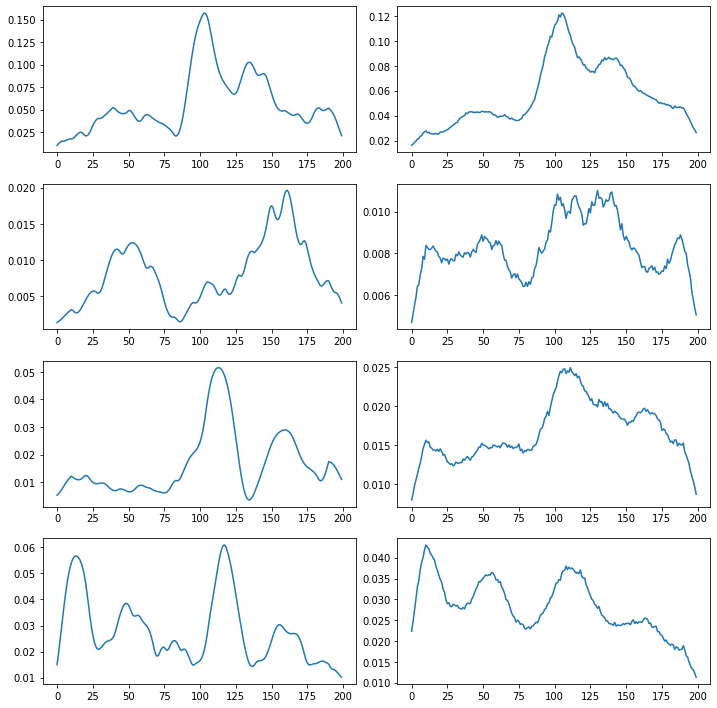

In [12]:
fig, axs = plt.subplots(4, 2, figsize=(10,10))
fig.tight_layout()

sample = 1

real_data = X_test_flat.reshape(X_test_flat.shape[0], w, ch)[sample,:,:]

axs[0,0].plot(real_data[:,0])
axs[1,0].plot(real_data[:,1])
axs[2,0].plot(real_data[:,2])
axs[3,0].plot(real_data[:,3])

deco_data = deep_autoencoder.predict(X_test_flat[sample,:].reshape(1, X_test_flat.shape[1]))
deco_data = deco_data.reshape(1, w, ch)[0,:,:]

axs[0,1].plot(deco_data[:,0])
axs[1,1].plot(deco_data[:,1])
axs[2,1].plot(deco_data[:,2])
axs[3,1].plot(deco_data[:,3])


# Convolutional Autoencoder

In [8]:
cnn_encoder = cnn_encoder((2,2))
cnn_decoder = cnn_decoder((w,ch,1))
cnn_autoencoder = autoencoder(cnn_encoder, cnn_decoder, (w,ch,1))

In [9]:
cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
cnn_autoencoder.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 4, 1)]       0         
                                                                 
 Convolutional_encoder (Sequ  (None, 100, 2, 16)       80        
 ential)                                                         
                                                                 
 Convolutional_decoder (Sequ  (None, 200, 4, 1)        553       
 ential)                                                         
                                                                 
Total params: 633
Trainable params: 633
Non-trainable params: 0
_________________________________________________________________


In [11]:
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

cnn_autoencoder.fit(X_train, X_train, epochs=100, batch_size=128, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/100
88/88 [==============================] - 12s 16ms/step - loss: 0.1148 - val_loss: 0.1123
Epoch 2/100
88/88 [==============================] - 1s 10ms/step - loss: 0.1074 - val_loss: 0.1088
Epoch 3/100
88/88 [==============================] - 1s 9ms/step - loss: 0.1056 - val_loss: 0.1077
Epoch 4/100
88/88 [==============================] - 1s 9ms/step - loss: 0.1048 - val_loss: 0.1071
Epoch 5/100
88/88 [==============================] - 1s 9ms/step - loss: 0.1043 - val_loss: 0.1064
Epoch 6/100
88/88 [==============================] - 1s 10ms/step - loss: 0.1037 - val_loss: 0.1056
Epoch 7/100
88/88 [==============================] - 1s 10ms/step - loss: 0.1028 - val_loss: 0.1047
Epoch 8/100
88/88 [==============================] - 1s 10ms/step - loss: 0.1021 - val_loss: 0.1042
Epoch 9/100
88/88 [==============================] - 1s 9ms/step - loss: 0.1016 - val_loss: 0.1038
Epoch 10/100
88/88 [==============================] - 1s 9ms/step - loss: 0.1013 - val_loss: 0.1036
Epo

1/1 [==============================] - 0s 382ms/step


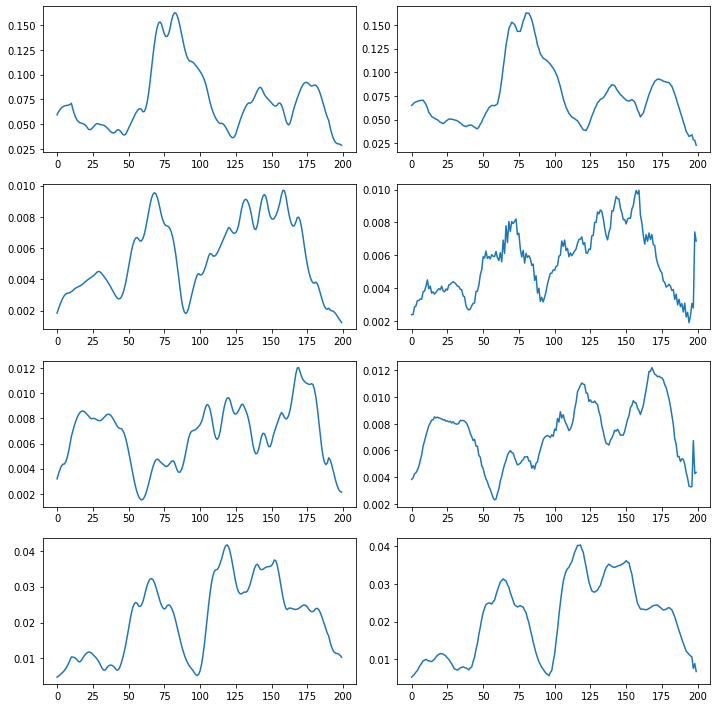

In [14]:
fig, axs = plt.subplots(4, 2, figsize=(10,10))
fig.tight_layout()

sample = 1

real_data = X_test[sample,:,:]

axs[0,0].plot(real_data[:,0])
axs[1,0].plot(real_data[:,1])
axs[2,0].plot(real_data[:,2])
axs[3,0].plot(real_data[:,3])

deco_data = cnn_autoencoder.predict(X_test[sample,:,:].reshape(1, w, ch, 1))
deco_data = deco_data.reshape(1, w, ch)[0,:,:]

axs[0,1].plot(deco_data[:,0])
axs[1,1].plot(deco_data[:,1])
axs[2,1].plot(deco_data[:,2])
axs[3,1].plot(deco_data[:,3])

# Sequence to Sequence Autoencoder